<a href="https://colab.research.google.com/github/alibhutto/Data-Science-Practice-Projects/blob/master/Stock%20Price%20Prediction%20Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
#load the stock data
from google.colab import files
uploaded = files.upload()

Saving BNS.csv to BNS.csv


In [4]:
#store the data into a data frame
df = pd.read_csv('BNS.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,50.860001,51.630001,50.799999,51.380001,47.946762,909900
1,2019-06-04,51.810001,52.349998,51.560001,52.259998,48.767956,1243000
2,2019-06-05,52.450001,52.450001,51.880001,52.099998,48.618649,454000
3,2019-06-06,52.240002,52.520000,52.139999,52.369999,48.870609,475800
4,2019-06-07,52.759998,53.230000,52.689999,52.990002,49.449184,1016900
5,2019-06-10,53.220001,53.439999,53.200001,53.270000,49.710468,436400


In [5]:
#get the number of trading days
df.shape

(272, 7)

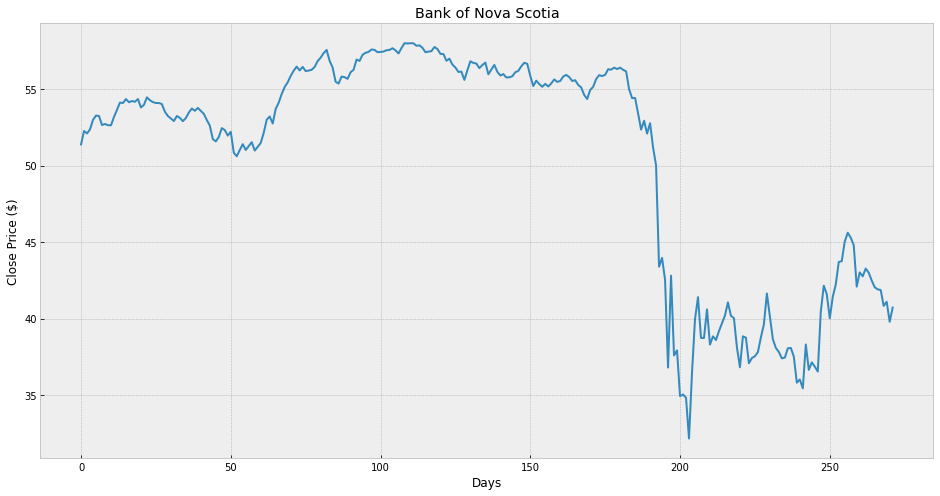

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Bank of Nova Scotia')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.show()

In [7]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,51.380001
1,52.259998
2,52.099998
3,52.369999


In [9]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
268,40.830002,NaN
269,41.099998,NaN
270,39.790001,NaN
271,40.720001,NaN


In [10]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[51.380001]
 [52.259998]
 [52.099998]
 [52.369999]
 [52.990002]
 [53.27    ]
 [53.240002]
 [52.650002]
 [52.720001]
 [52.639999]
 [52.630001]
 [53.18    ]
 [53.639999]
 [54.119999]
 [54.09    ]
 [54.349998]
 [54.139999]
 [54.220001]
 [54.169998]
 [54.349998]
 [53.799999]
 [53.970001]
 [54.459999]
 [54.27    ]
 [54.150002]
 [54.09    ]
 [54.09    ]
 [54.02    ]
 [53.52    ]
 [53.240002]
 [53.080002]
 [52.91    ]
 [53.240002]
 [53.119999]
 [52.900002]
 [53.110001]
 [53.470001]
 [53.73    ]
 [53.580002]
 [53.77    ]
 [53.580002]
 [53.380001]
 [52.98    ]
 [52.610001]
 [51.73    ]
 [51.580002]
 [51.869999]
 [52.450001]
 [52.32    ]
 [51.959999]
 [52.209999]
 [50.84    ]
 [50.610001]
 [51.02    ]
 [51.400002]
 [51.02    ]
 [51.27    ]
 [51.529999]
 [50.98    ]
 [51.23    ]
 [51.48    ]
 [52.139999]
 [53.      ]
 [53.209999]
 [52.75    ]
 [53.709999]
 [54.110001]
 [54.68    ]
 [55.139999]
 [55.439999]
 [55.860001]
 [56.200001]
 [56.470001]
 [56.220001]
 [56.450001]
 [56.18    ]
 [56.209999]

In [12]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/day
y = np.array(df['Prediction'])[:-future_days]
print(y)

[54.09     54.09     54.02     53.52     53.240002 53.080002 52.91
 53.240002 53.119999 52.900002 53.110001 53.470001 53.73     53.580002
 53.77     53.580002 53.380001 52.98     52.610001 51.73     51.580002
 51.869999 52.450001 52.32     51.959999 52.209999 50.84     50.610001
 51.02     51.400002 51.02     51.27     51.529999 50.98     51.23
 51.48     52.139999 53.       53.209999 52.75     53.709999 54.110001
 54.68     55.139999 55.439999 55.860001 56.200001 56.470001 56.220001
 56.450001 56.18     56.209999 56.259998 56.450001 56.830002 57.049999
 57.349998 57.560001 56.849998 56.41     55.48     55.360001 55.82
 55.779999 55.669998 56.099998 56.259998 56.93     56.84     57.240002
 57.369999 57.43     57.59     57.560001 57.41     57.43     57.450001
 57.540001 57.560001 57.669998 57.529999 57.330002 57.68     58.
 57.98     58.       57.990002 57.830002 57.860001 57.700001 57.41
 57.450001 57.48     57.75     57.619999 57.299999 57.290001 56.849998
 56.990002 56.599998 56.41  

In [14]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [15]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [16]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[38.75    ],
       [37.080002],
       [37.419998],
       [37.540001],
       [37.810001],
       [38.77    ],
       [39.619999],
       [41.639999],
       [40.139999],
       [38.650002],
       [38.080002],
       [37.82    ],
       [37.400002],
       [37.450001],
       [38.060001],
       [38.080002],
       [37.509998],
       [35.810001],
       [36.02    ],
       [35.439999],
       [38.310001],
       [36.650002],
       [37.139999],
       [36.860001],
       [36.540001]])

In [17]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[38.080002  42.150002  41.599998  43.        41.419998  42.23
 43.700001  43.75      45.040001  38.080002  44.2800005 41.419998
 42.09      43.02      42.759998  44.2800005 43.        42.049999
 42.049999  37.810001  37.450001  40.830002  41.099998  39.790001
 40.720001 ]

[40.80836494 39.58904869 39.8372901  39.92490793 40.12204313 40.82296754
 41.44357762 42.91844095 41.82324541 40.73535336 40.31917905 40.1293437
 39.82269041 39.8591962  40.30457572 40.31917905 39.90300183 38.66178241
 38.81510905 38.39163271 40.48710831 39.27509264 39.63285432 39.42841928
 39.19477757]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


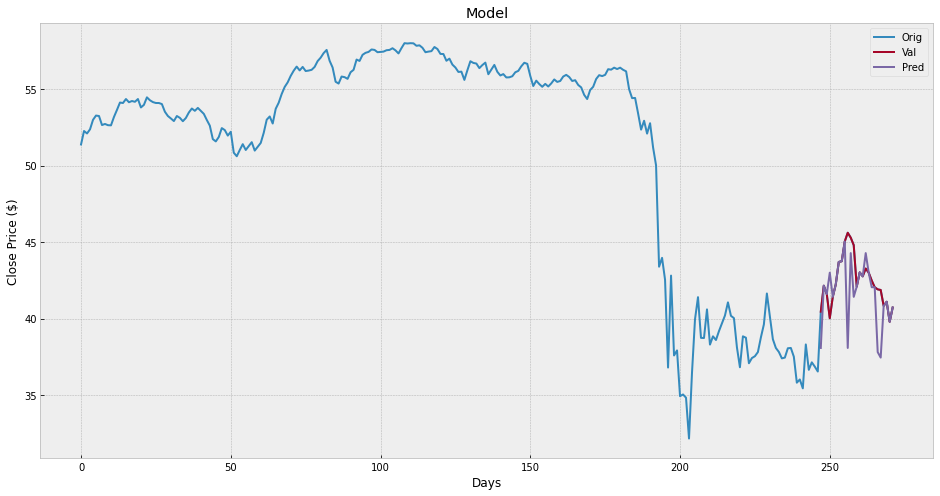

In [21]:
#Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


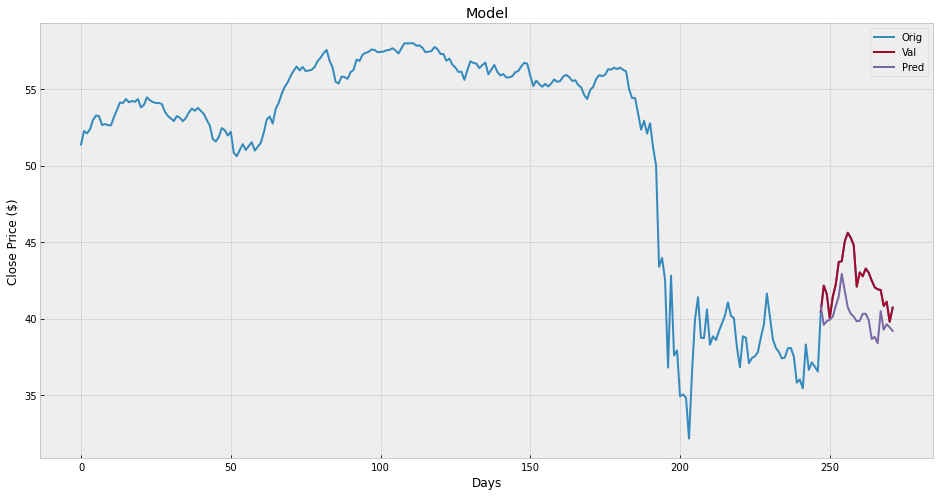

In [22]:
#Visualize the data
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()